We are going to be doing Semantic Segmentation

Most importantly, we are going to be using the Enet Architecture for semantic segmentation.
OpenCV will be our friend in this learning module.

In [1]:
import numpy as np
import argparse
import imutils
import time
import cv2

In [2]:
# ap = argparse.ArgumentParser()
# ap.add_argument("-m", "--model", required=True, help="path to deep learning segmentation model")
# ap.add_argument("-c", "--classes", required=True, help="path to .txt file containing class labels")
# ap.add_argument("-i", "--image", required=True, help="path to input image")
# ap.add_argument("-l", "--colors", type=str, help="path to .txt file containing colors for labels")
# ap.add_argument("-w", "--width", type=int, default=500, help="desired width (in pixels) of input image")
# args = vars(ap.parse_args())

In [3]:
model = 'enet/enet-model.net'
classes = 'enet/enet-classes.txt'
image = 'images/example_01.png'
colors = 'enet/enet-colors.txt'
width = 500

In [4]:
CLASSES = open(classes).read().strip().split("\n")
CLASSES

['Unlabeled',
 'Road',
 'Sidewalk',
 'Building',
 'Wall',
 'Fence',
 'Pole',
 'TrafficLight',
 'TrafficSign',
 'Vegetation',
 'Terrain',
 'Sky',
 'Person',
 'Rider',
 'Car',
 'Truck',
 'Bus',
 'Train',
 'Motorcycle',
 'Bicycle']

In [5]:
if colors:
    COLORS = open(colors).read().strip().split("\n")
    COLORS = [np.array(c.split(",")).astype("int") for c in COLORS]
    COLORS = np.array(COLORS, dtype="uint8")
else:
	np.random.seed(42)
	COLORS = np.random.randint(0, 255, size=(len(CLASSES) - 1, 3),
		dtype="uint8")
	COLORS = np.vstack([[0, 0, 0], COLORS]).astype("uint8")
COLORS

array([[  0,   0,   0],
       [ 81,   0,  81],
       [244,  35, 232],
       [ 70,  70,  70],
       [102, 102, 156],
       [190, 153, 153],
       [153, 153, 153],
       [250, 170,  30],
       [220, 220,   0],
       [107, 142,  35],
       [152, 251, 152],
       [ 70, 130, 180],
       [220,  20,  60],
       [255,   0,   0],
       [  0,   0, 142],
       [  0,   0,  70],
       [  0,  60, 100],
       [  0,  80, 100],
       [  0,   0, 230],
       [119,  11,  32]], dtype=uint8)

In [6]:
# for visualization
legend = np.zeros(((len(CLASSES) * 25) + 25, 300, 3), dtype="uint8")
legend.shape

(525, 300, 3)

In [7]:
# loop over the class names + colors
for i, (className, color) in enumerate(zip(CLASSES, COLORS)):
	# draw the class name + color on the legend
	color = [int(c) for c in color]
	cv2.putText(legend, className, (5, (i * 25) + 17),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
	cv2.rectangle(legend, (100, (i * 25)), (300, (i * 25) + 25),tuple(color), -1)

In [8]:
# load our serialized model from disk
print("[INFO] loading model...")
net = cv2.dnn.readNet(model)

[INFO] loading model...


In [9]:
# ENet was trained on was 1024x512
image = cv2.imread(image)
image = imutils.resize(image, width=width)
blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (1024, 512), 0,swapRB=True, crop=False)

In [10]:
# perform a forward pass using the segmentation model
net.setInput(blob)
start = time.time()
output = net.forward()
end = time.time()
print("[INFO] inference took {:.4f} seconds".format(end - start))


[INFO] inference took 0.0729 seconds


In [11]:
(numClasses, height, width) = output.shape[1:4]
(numClasses, height, width)

(20, 512, 1024)

In [12]:
# our output class ID map will be num_classes x height x width in
# size, so we take the argmax to find the class label with the
# largest probability for each and every (x, y)-coordinate in the
# image
classMap = np.argmax(output[0], axis=0)

# given the class ID map, we can map each of the class IDs to its
# corresponding color
mask = COLORS[classMap]

# resize the mask and class map such that its dimensions match the
# original size of the input image (we're not using the class map
# here for anything else but this is how you would resize it just in
# case you wanted to extract specific pixels/classes)
mask = cv2.resize(mask, (image.shape[1], image.shape[0]),
	interpolation=cv2.INTER_NEAREST)
classMap = cv2.resize(classMap, (image.shape[1], image.shape[0]),
	interpolation=cv2.INTER_NEAREST)

print(classMap.shape)
print(mask.shape)

(250, 500)
(250, 500, 3)


In [13]:
# perform a weighted combination of the input image with the mask to
# form an output visualization
output = ((0.4 * image) + (0.6 * mask)).astype("uint8")
output.shape

(250, 500, 3)

In [14]:
# # show the input and output images
# cv2.imshow("Legend", legend)
# cv2.imshow("Input", image)
# cv2.imshow("Output", output)
# cv2.waitKey(0)

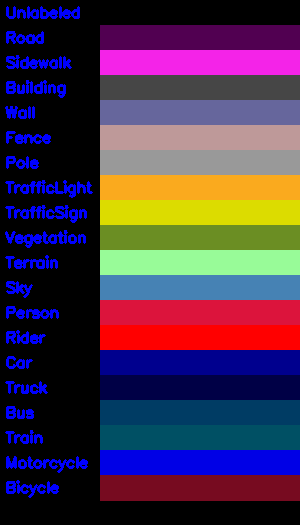

In [15]:
from PIL import Image

im_legend = Image.fromarray(legend)
im_legend

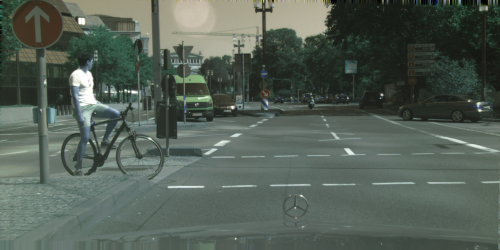

In [16]:
im = Image.fromarray(image)
im

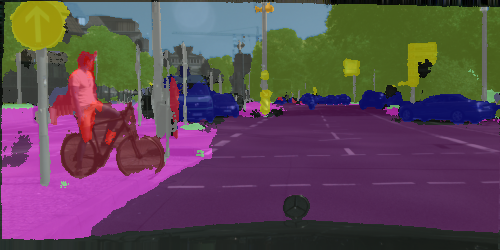

In [17]:
im_out = Image.fromarray(output)
im_out